In [1]:
#Boston House Prices Regression Analysis

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats

In [3]:
#load data
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#convert into data frame
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df["MEDV"] = boston.target

In [5]:
#get to know the data
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#get to know the data
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#check for missing values
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#check for duplicated rows
boston_df.duplicated().sum()

0

In [9]:
#check feature variance
variance = boston_df.var()
variance = variance.to_frame("variance")
variance

,variance
CRIM,73.986578
ZN,543.936814
INDUS,47.064442
CHAS,0.064513
NOX,0.013428
RM,0.493671
AGE,792.358399
DIS,4.434015
RAD,75.816366
TAX,28404.759488


In [10]:
#remove NOX
del boston_df["NOX"]

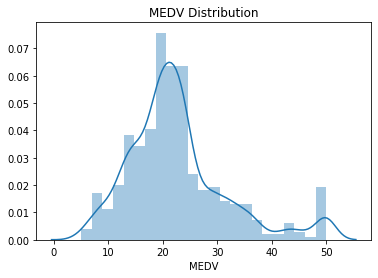

In [11]:
#check MEDV distribution
sn.distplot(boston_df["MEDV"], bins = "auto").set_title("MEDV Distribution")
plt.show()

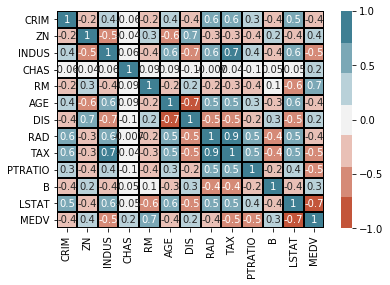

In [12]:
#correlation matrix
corr = boston_df.corr()
ax = sn.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sn.diverging_palette(20, 220, n = 7),
                fmt = ".1g", linewidths = 1, linecolor = "black", annot = True,
                cbar_kws = {"ticks" : [-1, -.5, 0, 0.5, 1]})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [13]:
#remove RAD and DIS
boston_df = boston_df.drop(["RAD", "DIS"], axis = 1)

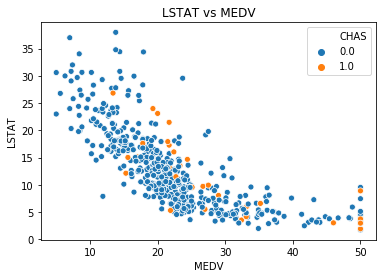

In [14]:
#plot highly correlated features with MEDV
MvL = sn.scatterplot(x = "MEDV", y = "LSTAT", hue = "CHAS", data = boston_df)
MvL.set_title("LSTAT vs MEDV")
plt.show()

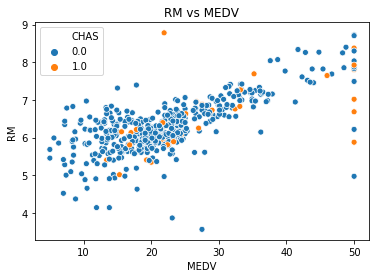

In [15]:
#plot highly correlated features with MEDV
MvR = sn.scatterplot(x = "MEDV", y = "RM", hue = "CHAS", data = boston_df)
MvR.set_title("RM vs MEDV")
plt.show()

In [16]:
#anova test for CHAS
df = boston_df[["MEDV", "CHAS"]]
F, p = stats.f_oneway(df[df.CHAS == 0].MEDV,
                      df[df.CHAS == 1].MEDV)
print("CHAS:", "%f" % p)

CHAS: 0.000074


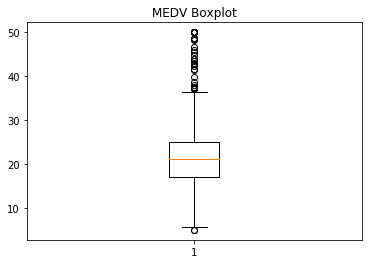

In [17]:
#check for outlers on MEDV
plt.boxplot(boston_df["MEDV"], whis = 1.5)
plt.title("MEDV Boxplot")
plt.show()

In [18]:
#outlier values
Q1 = boston_df["MEDV"].quantile(0.25)
Q3 = boston_df["MEDV"].quantile(0.75)
IQR = Q3 - Q1

boston_df[(df["MEDV"] < Q1 - 1.5 * IQR ) | (boston_df["MEDV"] > Q3 + 1.5 * IQR)]["MEDV"]

97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: MEDV, dtype: float64

In [19]:
#define features and dependant variable
X = boston_df[boston_df.columns.difference(["MEDV"])]
y = boston_df["MEDV"]

In [20]:
#define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [21]:
#train shape
X_train.shape, y_train.shape

((354, 10), (354,))

In [22]:
#test shape
X_test.shape, y_test.shape

((152, 10), (152,))

In [23]:
#linear regression for reference
reg0 = LinearRegression()
reg0.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#predictions
y_pred0 = reg0.predict(X_test)

In [25]:
#error metrics
rmse_0 = (np.sqrt(mean_squared_error(y_test, y_pred0)))
r2_0 = r2_score(y_test, y_pred0)

print("LM - Error Metrics:")
print("RMSE:" "\t" "%.3f" % rmse_0)
print("R^2:" "\t" "%.3f" % r2_0)

LM - Error Metrics:
RMSE:	5.820
R^2:	0.581


In [26]:
#extreme gradient boosted trees
reg = xgb.XGBRegressor(objective = "reg:squarederror",
                          colsample_bytree = 0.3, learning_rate = 0.1, 
                          max_depth = 5, alpha = 10, n_estimators = 500,
                          random_state = 123)

reg.fit(X_train, y_train)

C:\Users\FDL_4\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [27]:
#predictions
y_pred = reg.predict(X_test)

In [28]:
#error metrics
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("XGB - Error Metrics:")
print("RMSE:" "\t" "%.3f" % rmse)
print("R^2:" "\t" "%.3f" % r2)

XGB - Error Metrics:
RMSE:	4.326
R^2:	0.768


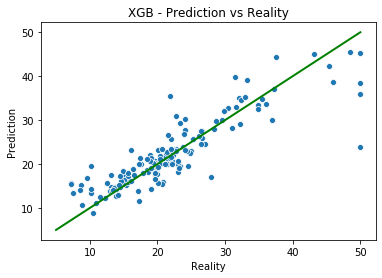

In [29]:
#comparing reality vs predictions
PvR = sn.scatterplot(x = y_test, y = y_pred)
PvR.set_title("XGB - Prediction vs Reality")
PvR.set_xlabel("Reality")
PvR.set_ylabel("Prediction")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = "g", lw = 2)
plt.show()

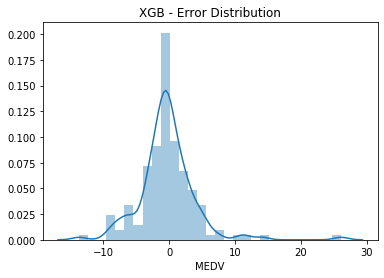

In [30]:
#error distribution
errors = y_test - y_pred
sn.distplot(errors, bins = "auto").set_title("XGB - Error Distribution")
plt.show()

In [31]:
#normalize data sets
sc_X = StandardScaler()
X_train_N = sc_X.fit_transform(X_train)
X_test_N = sc_X.fit_transform(X_test)

In [32]:
#svm
reg1 = SVR(kernel = "rbf", C = 200)
reg1.fit(X_train_N, y_train)

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
#predictions
y_pred1 = reg1.predict(X_test_N)

In [34]:
#error metrics
rmse_1 = (np.sqrt(mean_squared_error(y_test, y_pred1)))
r2_1 = r2_score(y_test, y_pred1)

print("SVM - Error Metrics:")
print("RMSE:" "\t" "%.3f" % rmse_1)
print("R^2:" "\t" "%.3f" % r2_1)

SVM - Error Metrics:
RMSE:	4.768
R^2:	0.719


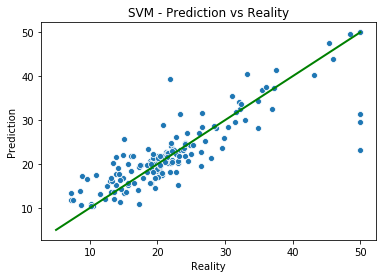

In [35]:
#comparing reality vs predictions
PvR = sn.scatterplot(x = y_test, y = y_pred1)
PvR.set_title("SVM - Prediction vs Reality")
PvR.set_xlabel("Reality")
PvR.set_ylabel("Prediction")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = "g", lw = 2)
plt.show()

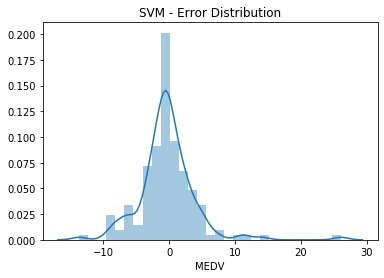

In [36]:
#error distribution
errors1 = y_test - y_pred1
sn.distplot(errors1, bins = "auto").set_title("SVM - Error Distribution")
plt.show()

In [37]:
print("Summary", "\n")
print("Linear Model:")
print("RMSE:" "\t" "%.3f" % rmse_0)
print("R^2:" "\t" "%.3f" % r2_0, "\n")
print("XGB:")
print("RMSE:" "\t" "%.3f" % rmse)
print("R^2:" "\t" "%.3f" % r2, "\n")
print("SVM:")
print("RMSE:" "\t" "%.3f" % rmse_1)
print("R^2:" "\t" "%.3f" % r2_1)

Summary 

Linear Model:
RMSE:	5.820
R^2:	0.581 

XGB:
RMSE:	4.326
R^2:	0.768 

SVM:
RMSE:	4.768
R^2:	0.719
